# 🔍 Validation des Données - Eye of Emergency

**Objectif** : Vérifier la qualité, la cohérence et le pouvoir prédictif des données preprocessées

**Date** : 28 juillet 2025  
**Version** : 1.0  
**Statut** : Validation post-preprocessing

---

## 📋 Plan de Validation

1. **🔄 Chargement et Inspection Générale**
2. **📊 Validation de la Qualité des Données**
3. **🎯 Validation de la Cohérence des Labels**
4. **⚙️ Validation des Features Extraites**
5. **🧠 Analyse du Pouvoir Prédictif**
6. **📈 Tests Statistiques de Significativité**
7. **✅ Rapport de Validation Final**

In [76]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📚 Bibliothèques importées avec succès")
print("🎨 Style des graphiques configuré")
print("ℹ️  Utilisation de pandas, numpy, scipy et matplotlib pour l'analyse")

📚 Bibliothèques importées avec succès
🎨 Style des graphiques configuré
ℹ️  Utilisation de pandas, numpy, scipy et matplotlib pour l'analyse


## 1. 🔄 Chargement et Inspection Générale

In [77]:
# Chargement des datasets optimisés - Version la plus récente (V3)
print("📁 Chargement des datasets optimisés V3...")

# Chargement de la version optimisée V3 (la plus récente)
try:
    train_df = pd.read_csv('../data/processed/train_optimized_v3.csv')
    test_df = pd.read_csv('../data/processed/test_optimized_v3.csv')
    current_version = "V3"
    print(f"✅ Version V3 chargée avec succès")
except FileNotFoundError:
    # Fallback vers V2 si V3 n'existe pas
    train_df = pd.read_csv('../data/processed/train_optimized_v2.csv')
    test_df = pd.read_csv('../data/processed/test_optimized_v2.csv')
    current_version = "V2"
    print(f"⚠️  V3 non trouvée, utilisation de V2")

# Comparaison avec les versions précédentes
versions_data = {}

try:
    train_df_v1 = pd.read_csv('../data/processed/train_optimized_v1.csv')
    test_df_v1 = pd.read_csv('../data/processed/test_optimized_v1.csv')
    versions_data['V1'] = {'train': train_df_v1, 'test': test_df_v1}
except:
    print("⚠️  Version V1 non trouvée")

try:
    train_df_v2 = pd.read_csv('../data/processed/train_optimized_v2.csv')
    test_df_v2 = pd.read_csv('../data/processed/test_optimized_v2.csv')
    versions_data['V2'] = {'train': train_df_v2, 'test': test_df_v2}
except:
    print("⚠️  Version V2 non trouvée")

try:
    if current_version != "V3":  # Si on n'a pas déjà chargé V3
        train_df_v3 = pd.read_csv('../data/processed/train_optimized_v3.csv')
        test_df_v3 = pd.read_csv('../data/processed/test_optimized_v3.csv')
        versions_data['V3'] = {'train': train_df_v3, 'test': test_df_v3}
    else:
        versions_data['V3'] = {'train': train_df, 'test': test_df}
except:
    print("⚠️  Version V3 non trouvée")

# Affichage de la comparaison des versions
print(f"\n🔄 COMPARAISON DES VERSIONS DISPONIBLES:")
for version, data in versions_data.items():
    train_data = data['train']
    print(f"   {version}: Train {len(train_data):,} tweets, {len(train_data.columns)} colonnes")

if len(versions_data) > 1:
    versions_list = list(versions_data.keys())
    latest = versions_list[-1]
    previous = versions_list[-2]
    col_diff = len(versions_data[previous]['train'].columns) - len(versions_data[latest]['train'].columns)
    print(f"   Évolution {previous}→{latest}: {col_diff:+d} colonnes")

print(f"✅ Train {current_version}: {len(train_df):,} tweets, {len(train_df.columns)} colonnes")
print(f"✅ Test {current_version}: {len(test_df):,} tweets, {len(test_df.columns)} colonnes")

# Inspection des premières lignes
print(f"\n🔍 Aperçu des données d'entraînement {current_version}:")
display(train_df.head())

print(f"\n📊 Structure des colonnes {current_version}:")
for i, col in enumerate(train_df.columns, 1):
    print(f"{i:2}. {col} ({train_df[col].dtype})")

📁 Chargement des datasets optimisés V3...
✅ Version V3 chargée avec succès

🔄 COMPARAISON DES VERSIONS DISPONIBLES:
   V1: Train 6,238 tweets, 19 colonnes
   V2: Train 6,238 tweets, 15 colonnes
   V3: Train 6,249 tweets, 24 colonnes
   Évolution V2→V3: -9 colonnes
✅ Train V3: 6,249 tweets, 24 colonnes
✅ Test V3: 751 tweets, 24 colonnes

🔍 Aperçu des données d'entraînement V3:


,id,keyword,target,text_cleaned,text_length,word_count,char_count,has_emergency_word,emergency_word_count,emergency_density,...,exclamation_count,caps_ratio,intense_punctuation,caps_word_count,caps_word_ratio,avg_word_length,urgency_score,unique_word_ratio,stopword_ratio,keyword_in_text
0,10293,weapon,0,mention_token changing my weapon!,33,4,33,False,0,0.000000,...,1,0.000000,0,0,0.0,7.500000,1.5,1.000000,0.250000,True
1,5096,famine,1,url_token russian food crematoria provoke outr...,115,11,87,True,1,0.090909,...,0,0.060870,0,0,0.0,7.000000,0.5,0.909091,0.000000,True
2,4041,disaster,0,the mention_token quote website disaster. trie...,143,22,153,True,1,0.045455,...,0,0.034965,0,0,0.0,6.000000,0.0,0.954545,0.181818,True
3,1637,bombing,1,mention_token mention_token mention_token cong...,140,19,151,True,1,0.052632,...,0,0.014286,0,0,0.0,7.000000,0.0,0.894737,0.263158,True
4,7614,pandemonium,0,world class tgirl ass small_num - scene small_...,71,11,73,False,0,0.000000,...,0,0.126761,0,0,0.0,5.727273,0.0,0.818182,0.000000,True



📊 Structure des colonnes V3:
 1. id (int64)
 2. keyword (object)
 3. target (int64)
 4. text_cleaned (object)
 5. text_length (int64)
 6. word_count (int64)
 7. char_count (int64)
 8. has_emergency_word (bool)
 9. emergency_word_count (int64)
10. emergency_density (float64)
11. has_url (bool)
12. url_count (int64)
13. has_mention (bool)
14. mention_count (int64)
15. exclamation_count (int64)
16. caps_ratio (float64)
17. intense_punctuation (int64)
18. caps_word_count (int64)
19. caps_word_ratio (float64)
20. avg_word_length (float64)
21. urgency_score (float64)
22. unique_word_ratio (float64)
23. stopword_ratio (float64)
24. keyword_in_text (bool)


In [78]:
# Statistiques descriptives générales
print("📈 STATISTIQUES DESCRIPTIVES GÉNÉRALES")
print("=" * 50)

print(f"📊 Dataset Train:")
print(f"   Nombre de tweets: {len(train_df):,}")
print(f"   Nombre de colonnes: {len(train_df.columns)}")
print(f"   Mémoire utilisée: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📊 Dataset Test:")
print(f"   Nombre de tweets: {len(test_df):,}")
print(f"   Nombre de colonnes: {len(test_df.columns)}")
print(f"   Mémoire utilisée: {test_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Distribution des classes (train seulement)
print(f"\n🎯 Distribution des classes (Train):")
class_dist = train_df['target'].value_counts()
class_pct = train_df['target'].value_counts(normalize=True) * 100
for cls in [0, 1]:
    label = "Non-catastrophe" if cls == 0 else "Catastrophe"
    print(f"   Classe {cls} ({label}): {class_dist[cls]:,} tweets ({class_pct[cls]:.1f}%)")

ratio = class_dist[0] / class_dist[1]
print(f"   Ratio d'équilibrage: {ratio:.2f}")

📈 STATISTIQUES DESCRIPTIVES GÉNÉRALES
📊 Dataset Train:
   Nombre de tweets: 6,249
   Nombre de colonnes: 24
   Mémoire utilisée: 2.13 MB

📊 Dataset Test:
   Nombre de tweets: 751
   Nombre de colonnes: 24
   Mémoire utilisée: 0.26 MB

🎯 Distribution des classes (Train):
   Classe 0 (Non-catastrophe): 3,671 tweets (58.7%)
   Classe 1 (Catastrophe): 2,578 tweets (41.3%)
   Ratio d'équilibrage: 1.42


## 2. 📊 Validation de la Qualité des Données

In [79]:
def validate_data_quality(df, dataset_name):
    """Valide la qualité d'un dataset"""
    print(f"\n🔍 VALIDATION QUALITÉ - {dataset_name}")
    print("=" * 40)
    
    # 1. Valeurs manquantes
    missing = df.isnull().sum()
    print("📋 Valeurs manquantes:")
    if missing.sum() == 0:
        print("   ✅ Aucune valeur manquante")
    else:
        for col, count in missing[missing > 0].items():
            pct = (count / len(df)) * 100
            print(f"   ⚠️  {col}: {count} ({pct:.1f}%)")
    
    # 2. Doublons
    duplicates = df.duplicated().sum()
    print(f"\n📋 Doublons complets: {duplicates}")
    if duplicates == 0:
        print("   ✅ Aucun doublon")
    else:
        print(f"   ⚠️  {duplicates} doublons trouvés")
    
    # 3. Doublons de texte
    if 'text_cleaned' in df.columns:
        text_dupes = df['text_cleaned'].duplicated().sum()
        print(f"\n📋 Doublons de texte: {text_dupes}")
        if text_dupes == 0:
            print("   ✅ Aucun doublon de texte")
        else:
            print(f"   ⚠️  {text_dupes} doublons de texte")
    
    # 4. Textes vides
    if 'text_cleaned' in df.columns:
        empty_texts = (df['text_cleaned'] == '').sum() + df['text_cleaned'].isnull().sum()
        print(f"\n📋 Textes vides: {empty_texts}")
        if empty_texts == 0:
            print("   ✅ Aucun texte vide")
        else:
            print(f"   ⚠️  {empty_texts} textes vides")
    
    # 5. Cohérence des types de données
    print("\n📋 Types de données:")
    type_issues = []
    
    # Vérification des colonnes numériques
    numeric_cols = ['text_length', 'word_count', 'char_count', 'url_count', 'mention_count', 
                   'hashtag_count', 'exclamation_count', 'question_count', 'caps_ratio', 'number_count']
    for col in numeric_cols:
        if col in df.columns:
            if not pd.api.types.is_numeric_dtype(df[col]):
                type_issues.append(f"{col} devrait être numérique")
    
    # Vérification des colonnes booléennes
    bool_cols = ['has_url', 'has_mention', 'has_hashtag', 'has_emergency_word', 'has_keyword']
    for col in bool_cols:
        if col in df.columns:
            unique_vals = df[col].unique()
            if not all(val in [True, False, 0, 1] for val in unique_vals if pd.notna(val)):
                type_issues.append(f"{col} devrait être booléen")
    
    if type_issues:
        for issue in type_issues:
            print(f"   ⚠️  {issue}")
    else:
        print("   ✅ Tous les types sont cohérents")
    
    return {
        'missing_values': missing.sum(),
        'duplicates': duplicates,
        'text_duplicates': text_dupes if 'text_cleaned' in df.columns else 0,
        'empty_texts': empty_texts if 'text_cleaned' in df.columns else 0,
        'type_issues': len(type_issues)
    }

# Validation des deux datasets
train_quality = validate_data_quality(train_df, "TRAIN")
test_quality = validate_data_quality(test_df, "TEST")


🔍 VALIDATION QUALITÉ - TRAIN
📋 Valeurs manquantes:
   ⚠️  keyword: 49 (0.8%)

📋 Doublons complets: 0
   ✅ Aucun doublon

📋 Doublons de texte: 0
   ✅ Aucun doublon de texte

📋 Textes vides: 0
   ✅ Aucun texte vide

📋 Types de données:
   ✅ Tous les types sont cohérents

🔍 VALIDATION QUALITÉ - TEST
📋 Valeurs manquantes:
   ⚠️  keyword: 6 (0.8%)

📋 Doublons complets: 0
   ✅ Aucun doublon

📋 Doublons de texte: 0
   ✅ Aucun doublon de texte

📋 Textes vides: 0
   ✅ Aucun texte vide

📋 Types de données:
   ✅ Tous les types sont cohérents


In [80]:
# Validation des plages de valeurs des features
print("\n📊 VALIDATION DES PLAGES DE VALEURS")
print("=" * 40)

def validate_feature_ranges(df, dataset_name):
    """Valide les plages de valeurs des features"""
    print(f"\n🎯 {dataset_name}:")
    
    issues = []
    
    # 1. Longueurs de texte
    if 'text_length' in df.columns:
        min_len, max_len = df['text_length'].min(), df['text_length'].max()
        print(f"   Longueur texte: {min_len} - {max_len} caractères")
        if min_len < 0 or max_len > 1000:  # Limites raisonnables pour Twitter
            issues.append("Longueurs de texte suspectes")
    
    # 2. Nombre de mots
    if 'word_count' in df.columns:
        min_words, max_words = df['word_count'].min(), df['word_count'].max()
        print(f"   Nombre de mots: {min_words} - {max_words} mots")
        if min_words < 0 or max_words > 200:
            issues.append("Nombre de mots suspect")
    
    # 3. Ratio de majuscules
    if 'caps_ratio' in df.columns:
        min_caps, max_caps = df['caps_ratio'].min(), df['caps_ratio'].max()
        print(f"   Ratio majuscules: {min_caps:.3f} - {max_caps:.3f}")
        if min_caps < 0 or max_caps > 1:
            issues.append("Ratio de majuscules invalide")
    
    # 4. Compteurs (doivent être >= 0)
    count_cols = ['url_count', 'mention_count', 'hashtag_count', 'exclamation_count', 'question_count', 'number_count']
    for col in count_cols:
        if col in df.columns:
            min_val = df[col].min()
            if min_val < 0:
                issues.append(f"{col} a des valeurs négatives")
    
    # 5. Cohérence entre features booléennes et compteurs
    coherence_checks = [
        ('has_url', 'url_count'),
        ('has_mention', 'mention_count'),
        ('has_hashtag', 'hashtag_count')
    ]
    
    for bool_col, count_col in coherence_checks:
        if bool_col in df.columns and count_col in df.columns:
            # Si has_X est True, alors X_count doit être > 0
            incoherent = ((df[bool_col] == True) & (df[count_col] == 0)).sum()
            if incoherent > 0:
                issues.append(f"Incohérence {bool_col}/{count_col}: {incoherent} cas")
            
            # Si X_count > 0, alors has_X doit être True
            incoherent2 = ((df[count_col] > 0) & (df[bool_col] == False)).sum()
            if incoherent2 > 0:
                issues.append(f"Incohérence {count_col}/{bool_col}: {incoherent2} cas")
    
    if issues:
        for issue in issues:
            print(f"   ⚠️  {issue}")
    else:
        print("   ✅ Toutes les plages sont valides")
    
    return len(issues)

train_range_issues = validate_feature_ranges(train_df, "TRAIN")
test_range_issues = validate_feature_ranges(test_df, "TEST")


📊 VALIDATION DES PLAGES DE VALEURS

🎯 TRAIN:
   Longueur texte: 7 - 157 caractères
   Nombre de mots: 1 - 35 mots
   Ratio majuscules: 0.000 - 1.000
   ✅ Toutes les plages sont valides

🎯 TEST:
   Longueur texte: 18 - 148 caractères
   Nombre de mots: 2 - 32 mots
   Ratio majuscules: 0.000 - 0.857
   ✅ Toutes les plages sont valides
   Ratio majuscules: 0.000 - 0.857
   ✅ Toutes les plages sont valides


## 3. 🎯 Validation de la Cohérence des Labels

In [81]:
# Validation de la cohérence des labels (train seulement)
print("🎯 VALIDATION DE LA COHÉRENCE DES LABELS")
print("=" * 45)

def validate_labels(df):
    """Valide la cohérence des labels"""
    if 'target' not in df.columns:
        print("⚠️  Pas de colonne target (dataset de test)")
        return {}
    
    # 1. Valeurs de target
    unique_targets = sorted(df['target'].unique())
    print(f"📊 Valeurs de target: {unique_targets}")
    
    issues = []
    if not all(val in [0, 1] for val in unique_targets):
        issues.append("Valeurs de target invalides (doivent être 0 ou 1)")
    
    # 2. Distribution des classes
    class_counts = df['target'].value_counts().sort_index()
    print(f"\n📊 Distribution des classes:")
    for cls, count in class_counts.items():
        pct = (count / len(df)) * 100
        label = "Non-catastrophe" if cls == 0 else "Catastrophe"
        print(f"   Classe {cls} ({label}): {count:,} tweets ({pct:.1f}%)")
    
    # 3. Équilibrage des classes
    minority_class = class_counts.min()
    majority_class = class_counts.max()
    imbalance_ratio = majority_class / minority_class
    print(f"\n⚖️ Ratio de déséquilibre: {imbalance_ratio:.2f}")
    
    if imbalance_ratio > 3:
        issues.append(f"Classes très déséquilibrées (ratio {imbalance_ratio:.2f})")
    elif imbalance_ratio > 2:
        print("   ⚠️  Classes modérément déséquilibrées")
    else:
        print("   ✅ Classes relativement équilibrées")
    
    # 4. Vérification des conflits de labels (même texte, labels différents)
    if 'text_cleaned' in df.columns:
        text_label_groups = df.groupby('text_cleaned')['target'].nunique()
        conflicts = (text_label_groups > 1).sum()
        print(f"\n🔍 Conflits de labels: {conflicts}")
        
        if conflicts > 0:
            issues.append(f"{conflicts} textes avec labels conflictuels")
            # Afficher quelques exemples
            conflict_texts = text_label_groups[text_label_groups > 1].index[:3]
            print("   Exemples de conflits:")
            for text in conflict_texts:
                labels = df[df['text_cleaned'] == text]['target'].unique()
                print(f"   '{text[:50]}...' → targets: {labels}")
        else:
            print("   ✅ Aucun conflit de label")
    
    if issues:
        print("\n⚠️  Problèmes détectés:")
        for issue in issues:
            print(f"   - {issue}")
    else:
        print("\n✅ Labels cohérents")
    
    return {
        'unique_values': unique_targets,
        'class_distribution': class_counts.to_dict(),
        'imbalance_ratio': imbalance_ratio,
        'label_conflicts': conflicts if 'text_cleaned' in df.columns else 0,
        'issues': len(issues)
    }

label_validation = validate_labels(train_df)

🎯 VALIDATION DE LA COHÉRENCE DES LABELS
📊 Valeurs de target: [0, 1]

📊 Distribution des classes:
   Classe 0 (Non-catastrophe): 3,671 tweets (58.7%)
   Classe 1 (Catastrophe): 2,578 tweets (41.3%)

⚖️ Ratio de déséquilibre: 1.42
   ✅ Classes relativement équilibrées

🔍 Conflits de labels: 0
   ✅ Aucun conflit de label

✅ Labels cohérents


## 4. ⚙️ Validation des Features Extraites

In [82]:
# Validation des features extraites
print("⚙️ VALIDATION DES FEATURES EXTRAITES")
print("=" * 40)

def validate_features(df, dataset_name):
    """Valide les features extraites"""
    print(f"\n🔍 {dataset_name}:")
    
    # Identifier les features
    base_cols = ['id', 'keyword', 'target', 'text_cleaned']
    feature_cols = [col for col in df.columns if col not in base_cols]
    
    print(f"📊 {len(feature_cols)} features extraites:")
    for i, col in enumerate(feature_cols, 1):
        print(f"   {i:2}. {col}")
    
    # Statistiques descriptives des features numériques
    numeric_features = df[feature_cols].select_dtypes(include=[np.number]).columns
    print(f"\n📈 Statistiques des features numériques ({len(numeric_features)}):")
    
    desc_stats = df[numeric_features].describe()
    display(desc_stats.round(3))
    
    # Détection des features constantes
    constant_features = []
    for col in feature_cols:
        if df[col].nunique() <= 1:
            constant_features.append(col)
    
    print(f"\n🚨 Features constantes: {len(constant_features)}")
    if constant_features:
        for feat in constant_features:
            unique_val = df[feat].unique()[0]
            print(f"   ⚠️  {feat}: toujours {unique_val}")
    else:
        print("   ✅ Aucune feature constante")
    
    # Détection des features quasi-constantes (>95% même valeur)
    quasi_constant = []
    for col in feature_cols:
        if col not in constant_features:
            value_counts = df[col].value_counts(normalize=True)
            max_freq = value_counts.iloc[0]
            if max_freq > 0.95:
                quasi_constant.append((col, max_freq, value_counts.index[0]))
    
    print(f"\n⚠️  Features quasi-constantes (>95%): {len(quasi_constant)}")
    if quasi_constant:
        for feat, freq, val in quasi_constant:
            print(f"   {feat}: {freq:.1%} = {val}")
    else:
        print("   ✅ Aucune feature quasi-constante")
    
    return {
        'total_features': len(feature_cols),
        'numeric_features': len(numeric_features),
        'constant_features': len(constant_features),
        'quasi_constant_features': len(quasi_constant),
        'feature_names': feature_cols
    }

train_features = validate_features(train_df, "TRAIN")
test_features = validate_features(test_df, "TEST")

⚙️ VALIDATION DES FEATURES EXTRAITES

🔍 TRAIN:
📊 20 features extraites:
    1. text_length
    2. word_count
    3. char_count
    4. has_emergency_word
    5. emergency_word_count
    6. emergency_density
    7. has_url
    8. url_count
    9. has_mention
   10. mention_count
   11. exclamation_count
   12. caps_ratio
   13. intense_punctuation
   14. caps_word_count
   15. caps_word_ratio
   16. avg_word_length
   17. urgency_score
   18. unique_word_ratio
   19. stopword_ratio
   20. keyword_in_text

📈 Statistiques des features numériques (16):


,text_length,word_count,char_count,emergency_word_count,emergency_density,url_count,mention_count,exclamation_count,caps_ratio,intense_punctuation,caps_word_count,caps_word_ratio,avg_word_length,urgency_score,unique_word_ratio,stopword_ratio
count,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000,6249.000
mean,99.921,15.955,102.489,0.454,0.031,0.580,0.373,0.157,0.098,0.110,0.646,0.042,5.644,1.574,0.933,0.251
std,34.300,6.319,40.638,0.709,0.054,0.651,0.725,0.617,0.109,0.393,1.911,0.127,1.373,2.511,0.081,0.146
min,7.000,1.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.250,0.000,0.154,0.000
25%,75.000,11.000,72.000,0.000,0.000,0.000,0.000,0.000,0.036,0.000,0.000,0.000,4.667,0.000,0.895,0.143
50%,106.000,16.000,105.000,0.000,0.000,0.000,0.000,0.000,0.072,0.000,0.000,0.000,5.500,1.000,0.947,0.250
75%,133.000,21.000,132.000,1.000,0.053,1.000,1.000,0.000,0.123,0.000,0.000,0.000,6.385,2.000,1.000,0.357
max,157.000,35.000,304.000,7.000,0.500,4.000,8.000,12.000,1.000,9.000,23.000,1.000,16.800,60.000,1.000,0.750



🚨 Features constantes: 0
   ✅ Aucune feature constante

⚠️  Features quasi-constantes (>95%): 0
   ✅ Aucune feature quasi-constante

🔍 TEST:
📊 20 features extraites:
    1. text_length
    2. word_count
    3. char_count
    4. has_emergency_word
    5. emergency_word_count
    6. emergency_density
    7. has_url
    8. url_count
    9. has_mention
   10. mention_count
   11. exclamation_count
   12. caps_ratio
   13. intense_punctuation
   14. caps_word_count
   15. caps_word_ratio
   16. avg_word_length
   17. urgency_score
   18. unique_word_ratio
   19. stopword_ratio
   20. keyword_in_text

📈 Statistiques des features numériques (16):


,text_length,word_count,char_count,emergency_word_count,emergency_density,url_count,mention_count,exclamation_count,caps_ratio,intense_punctuation,caps_word_count,caps_word_ratio,avg_word_length,urgency_score,unique_word_ratio,stopword_ratio
count,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000,751.000
mean,100.096,16.111,102.803,0.447,0.030,0.582,0.379,0.197,0.098,0.119,0.594,0.042,5.609,1.487,0.931,0.248
std,33.894,6.306,40.377,0.693,0.051,0.662,0.746,0.786,0.112,0.414,1.713,0.129,1.346,2.364,0.087,0.149
min,18.000,2.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.571,0.000,0.417,0.000
25%,76.000,11.000,73.000,0.000,0.000,0.000,0.000,0.000,0.039,0.000,0.000,0.000,4.667,0.000,0.895,0.125
50%,105.000,16.000,104.000,0.000,0.000,0.000,0.000,0.000,0.073,0.000,0.000,0.000,5.438,1.000,0.950,0.250
75%,133.000,20.000,130.000,1.000,0.053,1.000,1.000,0.000,0.120,0.000,0.000,0.000,6.366,2.000,1.000,0.364
max,148.000,32.000,301.000,6.000,0.375,3.000,5.000,8.000,0.857,4.000,17.000,1.000,11.667,30.500,1.000,0.667



🚨 Features constantes: 0
   ✅ Aucune feature constante

⚠️  Features quasi-constantes (>95%): 0
   ✅ Aucune feature quasi-constante


In [83]:
# Validation de la cohérence entre train et test
print("\n🔄 COHÉRENCE TRAIN-TEST")
print("=" * 30)

# Comparaison des colonnes
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

# La seule différence attendue est la colonne 'target'
diff_train = train_cols - test_cols
diff_test = test_cols - train_cols

print(f"📊 Colonnes uniquement dans train: {diff_train}")
print(f"📊 Colonnes uniquement dans test: {diff_test}")

if diff_train == {'target'} and len(diff_test) == 0:
    print("✅ Structure cohérente (seule différence: colonne target)")
else:
    print("⚠️  Structure incohérente entre train et test")

# Comparaison des statistiques des features communes
common_features = [col for col in train_features['feature_names'] if col in test_df.columns]
print(f"\n📊 Features communes: {len(common_features)}")

# Comparaison des plages de valeurs
print("\n📈 Comparaison des plages de valeurs:")
for col in common_features[:5]:  # Afficher les 5 premières
    if pd.api.types.is_numeric_dtype(train_df[col]):
        train_range = f"{train_df[col].min():.3f} - {train_df[col].max():.3f}"
        test_range = f"{test_df[col].min():.3f} - {test_df[col].max():.3f}"
        print(f"   {col:20}: Train [{train_range}], Test [{test_range}]")


🔄 COHÉRENCE TRAIN-TEST
📊 Colonnes uniquement dans train: set()
📊 Colonnes uniquement dans test: set()
⚠️  Structure incohérente entre train et test

📊 Features communes: 20

📈 Comparaison des plages de valeurs:
   text_length         : Train [7.000 - 157.000], Test [18.000 - 148.000]
   word_count          : Train [1.000 - 35.000], Test [2.000 - 32.000]
   char_count          : Train [7.000 - 304.000], Test [18.000 - 301.000]
   has_emergency_word  : Train [0.000 - 1.000], Test [0.000 - 1.000]
   emergency_word_count: Train [0.000 - 7.000], Test [0.000 - 6.000]


## 5. 🧠 Analyse du Pouvoir Prédictif

🧠 ANALYSE DU POUVOIR PRÉDICTIF
📊 Analysant 20 features...

📈 Top 10 features par corrélation avec target:
📊 Analysant 20 features...

📈 Top 10 features par corrélation avec target:


,feature,correlation,abs_correlation
3,has_emergency_word,0.313069,0.313069
4,emergency_word_count,0.307108,0.307108
5,emergency_density,0.251918,0.251918
6,has_url,0.233809,0.233809
7,url_count,0.195330,0.195330
0,text_length,0.180185,0.180185
18,stopword_ratio,-0.173923,0.173923
15,avg_word_length,0.149807,0.149807
2,char_count,0.147929,0.147929
12,intense_punctuation,-0.106202,0.106202


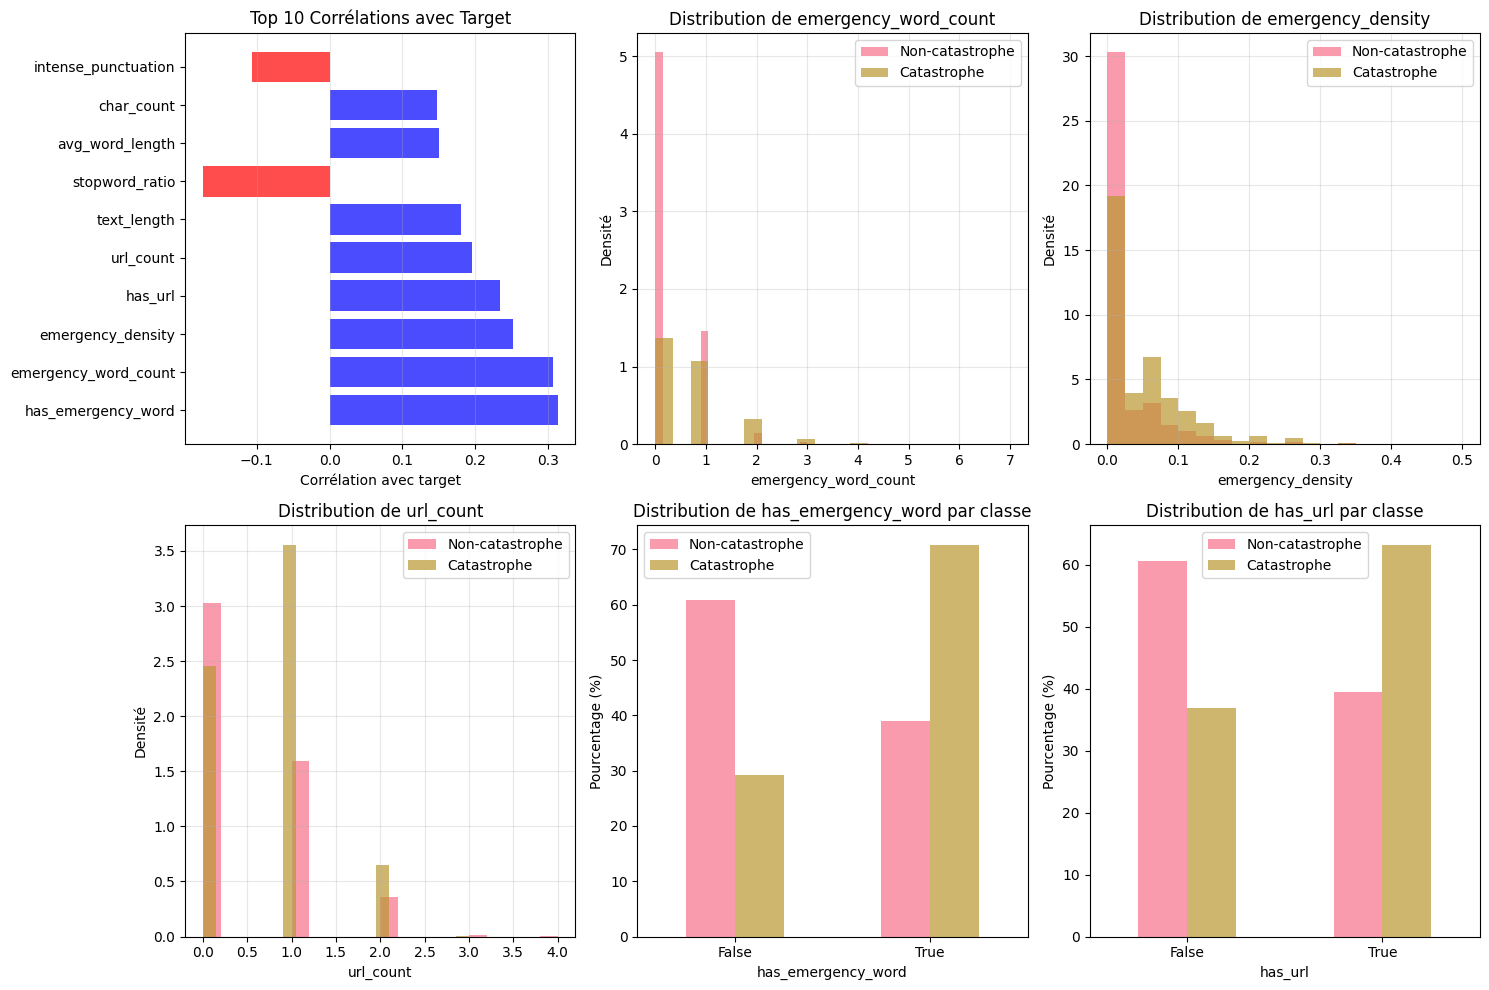

In [84]:
# Analyse du pouvoir prédictif des features
print("🧠 ANALYSE DU POUVOIR PRÉDICTIF")
print("=" * 35)

if 'target' in train_df.columns:
    # Préparation des données pour l'analyse
    feature_cols = [col for col in train_df.columns if col not in ['id', 'keyword', 'target', 'text_cleaned']]
    X = train_df[feature_cols]
    y = train_df['target']
    
    print(f"📊 Analysant {len(feature_cols)} features...")
    
    # 1. Corrélations avec le target
    correlations = []
    for col in feature_cols:
        if pd.api.types.is_numeric_dtype(X[col]):
            corr = X[col].corr(y)
            correlations.append({
                'feature': col,
                'correlation': corr,
                'abs_correlation': abs(corr)
            })
    
    corr_df = pd.DataFrame(correlations).sort_values('abs_correlation', ascending=False)
    
    print("\n📈 Top 10 features par corrélation avec target:")
    display(corr_df.head(10))
    
    # 2. Visualisation des corrélations
    plt.figure(figsize=(15, 10))
    
    # Graphique des corrélations
    plt.subplot(2, 3, 1)
    top_corr = corr_df.head(10)
    colors = ['red' if x < 0 else 'blue' for x in top_corr['correlation']]
    plt.barh(range(len(top_corr)), top_corr['correlation'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_corr)), top_corr['feature'])
    plt.xlabel('Corrélation avec target')
    plt.title('Top 10 Corrélations avec Target')
    plt.grid(axis='x', alpha=0.3)
    
    # Distribution des top 5 features par classe (uniquement numériques continues)
    top_numeric_features = []
    for feature in corr_df.head(5)['feature'].tolist():
        if train_df[feature].nunique() > 2:  # Features continues uniquement
            top_numeric_features.append(feature)
    
    for i, feature in enumerate(top_numeric_features[:3], 2):
        plt.subplot(2, 3, i)
        for target_val in [0, 1]:
            data = train_df[train_df['target'] == target_val][feature]
            label = 'Non-catastrophe' if target_val == 0 else 'Catastrophe'
            plt.hist(data, alpha=0.7, bins=20, label=label, density=True)
        plt.xlabel(feature)
        plt.ylabel('Densité')
        plt.title(f'Distribution de {feature}')
        plt.legend()
        plt.grid(alpha=0.3)
    
    # Graphiques en barres pour les features booléennes importantes
    bool_features = ['has_emergency_word', 'has_url', 'has_mention']
    for i, feature in enumerate(bool_features, 5):
        if i <= 6:
            plt.subplot(2, 3, i)
            # Créer un tableau de contingence
            contingency = pd.crosstab(train_df[feature], train_df['target'], normalize='columns') * 100
            contingency.plot(kind='bar', ax=plt.gca(), alpha=0.7)
            plt.title(f'Distribution de {feature} par classe')
            plt.ylabel('Pourcentage (%)')
            plt.xlabel(feature)
            plt.xticks(rotation=0)
            plt.legend(['Non-catastrophe', 'Catastrophe'])
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️  Pas de colonne target disponible pour l'analyse prédictive")
    corr_df = pd.DataFrame()

In [85]:
# Identification précise des features problématiques à supprimer
print("🎯 IDENTIFICATION DES FEATURES À SUPPRIMER POUR V3 AMÉLIORÉE")
print("=" * 65)

# 1. Features constantes (score = 0)
constant_features = []
for col in train_features['feature_names']:
    if train_df[col].nunique() <= 1:
        constant_features.append(col)

print(f"🗑️  FEATURES CONSTANTES À SUPPRIMER ({len(constant_features)}):")
for feat in constant_features:
    unique_val = train_df[feat].unique()[0]
    print(f"   ❌ {feat}: toujours {unique_val}")

# 2. Features quasi-constantes (>95% même valeur)
quasi_constant_features = []
for col in train_features['feature_names']:
    if col not in constant_features:
        value_counts = train_df[col].value_counts(normalize=True)
        max_freq = value_counts.iloc[0]
        if max_freq > 0.95:
            quasi_constant_features.append((col, max_freq, value_counts.index[0]))

print(f"\n⚠️  FEATURES QUASI-CONSTANTES À CONSIDÉRER ({len(quasi_constant_features)}):")
for feat, freq, val in quasi_constant_features:
    print(f"   ⚠️  {feat}: {freq:.1%} = {val}")

# 3. Features faiblement corrélées (corrélation < 0.05)
weak_corr_features = []
if len(corr_df) > 0:
    weak_corr_features = corr_df[corr_df['abs_correlation'] < 0.05]['feature'].tolist()

print(f"\n📉 FEATURES FAIBLEMENT CORRÉLÉES (<0.05) À ÉVALUER ({len(weak_corr_features)}):")
for feat in weak_corr_features:
    corr_val = corr_df[corr_df['feature'] == feat]['correlation'].iloc[0]
    print(f"   📉 {feat}: corrélation = {corr_val:.3f}")

# 4. Résumé des features à supprimer
features_to_remove = set(constant_features)

# Ajouter les quasi-constantes si leur corrélation est aussi faible
for feat, freq, val in quasi_constant_features:
    if feat in corr_df['feature'].values:
        corr_val = corr_df[corr_df['feature'] == feat]['abs_correlation'].iloc[0]
        if corr_val < 0.1:  # Quasi-constante ET faible corrélation
            features_to_remove.add(feat)

# Ajouter les features avec corrélation très faible (<0.03)
very_weak_features = corr_df[corr_df['abs_correlation'] < 0.03]['feature'].tolist()
features_to_remove.update(very_weak_features)

print(f"\n🎯 RÉSUMÉ - FEATURES À SUPPRIMER AUTOMATIQUEMENT:")
print(f"📊 Total: {len(features_to_remove)} features")
print("=" * 50)

for i, feat in enumerate(sorted(features_to_remove), 1):
    # Déterminer la raison
    if feat in constant_features:
        reason = "Constante (0 variance)"
    elif feat in [f[0] for f in quasi_constant_features]:
        reason = "Quasi-constante (>95%)"
    elif feat in very_weak_features:
        corr_val = corr_df[corr_df['feature'] == feat]['correlation'].iloc[0]
        reason = f"Très faible corrélation ({corr_val:.3f})"
    else:
        reason = "Critères multiples"
    
    print(f"   {i:2}. ❌ {feat}: {reason}")

# 5. Features à conserver avec leur score
features_to_keep = [feat for feat in train_features['feature_names'] if feat not in features_to_remove]

print(f"\n✅ FEATURES À CONSERVER ({len(features_to_keep)}):")
keep_corr = []
for feat in features_to_keep:
    if feat in corr_df['feature'].values:
        corr_val = corr_df[corr_df['feature'] == feat]['abs_correlation'].iloc[0]
        keep_corr.append((feat, corr_val))

keep_corr.sort(key=lambda x: x[1], reverse=True)

for i, (feat, corr_val) in enumerate(keep_corr, 1):
    status = "🔥" if corr_val > 0.2 else "⭐" if corr_val > 0.1 else "✅"
    print(f"   {i:2}. {status} {feat}: {corr_val:.3f}")

# 6. Impact de la suppression
print(f"\n📈 IMPACT DE L'OPTIMISATION:")
print(f"   Features initiales: {len(train_features['feature_names'])}")
print(f"   Features supprimées: {len(features_to_remove)}")
print(f"   Features finales: {len(features_to_keep)}")
print(f"   Réduction: {(len(features_to_remove)/len(train_features['feature_names']))*100:.1f}%")

if len(keep_corr) > 0:
    avg_corr_kept = np.mean([corr for _, corr in keep_corr])
    strong_corr_kept = sum(1 for _, corr in keep_corr if corr > 0.2)
    print(f"   Corrélation moyenne conservée: {avg_corr_kept:.3f}")
    print(f"   Features fortes conservées (>0.2): {strong_corr_kept}")

# Génération du code pour la suppression
print(f"\n💻 CODE POUR L'IMPLÉMENTATION:")
print("=" * 35)
print("# Features à supprimer dans le preprocessing V3:")
print("features_to_remove = {")
for feat in sorted(features_to_remove):
    print(f"    '{feat}',")
print("}")

# Sauvegarde de la liste pour utilisation
features_removal_config = {
    'constant_features': constant_features,
    'quasi_constant_features': [f[0] for f in quasi_constant_features],
    'weak_correlation_features': weak_corr_features,
    'features_to_remove': list(features_to_remove),
    'features_to_keep': features_to_keep,
    'optimization_stats': {
        'initial_count': len(train_features['feature_names']),
        'removed_count': len(features_to_remove),
        'final_count': len(features_to_keep),
        'reduction_percentage': (len(features_to_remove)/len(train_features['feature_names']))*100
    }
}

# Sauvegarde pour utilisation dans le script
import json
with open('../results/features_removal_config_v3.json', 'w') as f:
    json.dump(features_removal_config, f, indent=2)

print(f"\n💾 Configuration sauvegardée: ../results/features_removal_config_v3.json")

🎯 IDENTIFICATION DES FEATURES À SUPPRIMER POUR V3 AMÉLIORÉE
🗑️  FEATURES CONSTANTES À SUPPRIMER (0):

⚠️  FEATURES QUASI-CONSTANTES À CONSIDÉRER (0):

📉 FEATURES FAIBLEMENT CORRÉLÉES (<0.05) À ÉVALUER (4):
   📉 caps_ratio: corrélation = 0.026
   📉 caps_word_count: corrélation = 0.022
   📉 caps_word_ratio: corrélation = -0.006
   📉 unique_word_ratio: corrélation = -0.002

🎯 RÉSUMÉ - FEATURES À SUPPRIMER AUTOMATIQUEMENT:
📊 Total: 4 features
    1. ❌ caps_ratio: Très faible corrélation (0.026)
    2. ❌ caps_word_count: Très faible corrélation (0.022)
    3. ❌ caps_word_ratio: Très faible corrélation (-0.006)
    4. ❌ unique_word_ratio: Très faible corrélation (-0.002)

✅ FEATURES À CONSERVER (16):
    1. 🔥 has_emergency_word: 0.313
    2. 🔥 emergency_word_count: 0.307
    3. 🔥 emergency_density: 0.252
    4. 🔥 has_url: 0.234
    5. ⭐ url_count: 0.195
    6. ⭐ text_length: 0.180
    7. ⭐ stopword_ratio: 0.174
    8. ⭐ avg_word_length: 0.150
    9. ⭐ char_count: 0.148
   10. ⭐ intense_punct

In [86]:
# Analyse plus approfondie du pouvoir prédictif
if 'target' in train_df.columns and len(corr_df) > 0:
    print("\n🔍 ANALYSE APPROFONDIE DU POUVOIR PRÉDICTIF")
    print("=" * 45)
    
    # 3. Test de chi-carré pour les features booléennes
    bool_features = []
    for col in feature_cols:
        unique_vals = X[col].unique()
        if len(unique_vals) <= 2 and all(val in [0, 1, True, False] for val in unique_vals if pd.notna(val)):
            bool_features.append(col)
    
    if bool_features:
        print(f"\n📊 Test Chi-carré pour {len(bool_features)} features booléennes:")
        chi2_results = []
        
        for feature in bool_features:
            # Table de contingence
            contingency = pd.crosstab(X[feature], y)
            chi2_stat, p_value = stats.chi2_contingency(contingency)[:2]
            
            chi2_results.append({
                'feature': feature,
                'chi2_stat': chi2_stat,
                'p_value': p_value,
                'significant': p_value < 0.05
            })
        
        chi2_df = pd.DataFrame(chi2_results).sort_values('chi2_stat', ascending=False)
        display(chi2_df.head(10))
        
        significant_features = chi2_df[chi2_df['significant']]['feature'].tolist()
        print(f"\n✅ {len(significant_features)} features booléennes significatives (p < 0.05)")
    
    # 4. Analyse des moyennes par classe
    print("\n📊 ANALYSE DES MOYENNES PAR CLASSE")
    print("=" * 35)
    
    class_means = train_df.groupby('target')[feature_cols].mean()
    
    # Calculer les différences entre classes
    if len(class_means) == 2:
        mean_diff = abs(class_means.loc[1] - class_means.loc[0])
        mean_diff_sorted = mean_diff.sort_values(ascending=False)
        
        print("Top 10 features avec plus grande différence de moyenne:")
        for feature in mean_diff_sorted.head(10).index:
            mean_0 = class_means.loc[0, feature]
            mean_1 = class_means.loc[1, feature]
            diff = abs(mean_1 - mean_0)
            print(f"   {feature:20}: Non-cat={mean_0:.3f}, Cat={mean_1:.3f}, Diff={diff:.3f}")


🔍 ANALYSE APPROFONDIE DU POUVOIR PRÉDICTIF

📊 Test Chi-carré pour 4 features booléennes:


,feature,chi2_stat,p_value,significant
0,has_emergency_word,611.207005,6.112563e-135,True
1,has_url,340.662697,4.576647e-76,True
2,has_mention,58.180169,2.391780e-14,True
3,keyword_in_text,51.409317,7.498184e-13,True



✅ 4 features booléennes significatives (p < 0.05)

📊 ANALYSE DES MOYENNES PAR CLASSE
Top 10 features avec plus grande différence de moyenne:
   text_length         : Non-cat=94.742, Cat=107.296, Diff=12.553
   char_count          : Non-cat=97.451, Cat=109.662, Diff=12.210
   word_count          : Non-cat=15.659, Cat=16.375, Diff=0.716
   emergency_word_count: Non-cat=0.271, Cat=0.714, Diff=0.442
   avg_word_length     : Non-cat=5.472, Cat=5.890, Diff=0.418
   has_emergency_word  : Non-cat=0.391, Cat=0.708, Diff=0.318
   urgency_score       : Non-cat=1.701, Cat=1.393, Diff=0.307
   url_count           : Non-cat=0.473, Cat=0.732, Diff=0.258
   has_url             : Non-cat=0.394, Cat=0.632, Diff=0.237
   mention_count       : Non-cat=0.421, Cat=0.305, Diff=0.117


## 6. 📈 Tests Statistiques de Significativité

📈 TESTS STATISTIQUES DE SIGNIFICATIVITÉ

🔬 Test t de Student pour 16 features continues:

Top 10 features par taille d'effet (Cohen's d):

🔬 Test t de Student pour 16 features continues:

Top 10 features par taille d'effet (Cohen's d):


,feature,t_stat,p_value,cohens_d,significant,effect_size
3,emergency_word_count,23.468171,5.857027e-114,0.655406,True,Medium
4,emergency_density,19.414099,1.412421e-80,0.528693,True,Medium
5,url_count,15.798667,4.800111e-55,0.404505,True,Small
0,text_length,14.978667,7.732242e-50,0.372044,True,Small
15,stopword_ratio,14.247868,2.582016e-45,0.358702,True,Small
12,avg_word_length,12.350175,1.265156e-34,0.307730,True,Small
2,char_count,11.977247,1.134534e-32,0.303784,True,Small
9,intense_punctuation,9.004344,2.834996e-19,0.216921,True,Small
6,mention_count,6.433713,1.341938e-10,0.161316,True,Negligible
7,exclamation_count,6.010394,1.956274e-09,0.147967,True,Negligible



📊 Résumé des tests t:
   Features significatives: 13/16
   Effect size large (>0.8): 0
   Effect size medium (0.5-0.8): 2
   Effect size small (0.2-0.5): 6


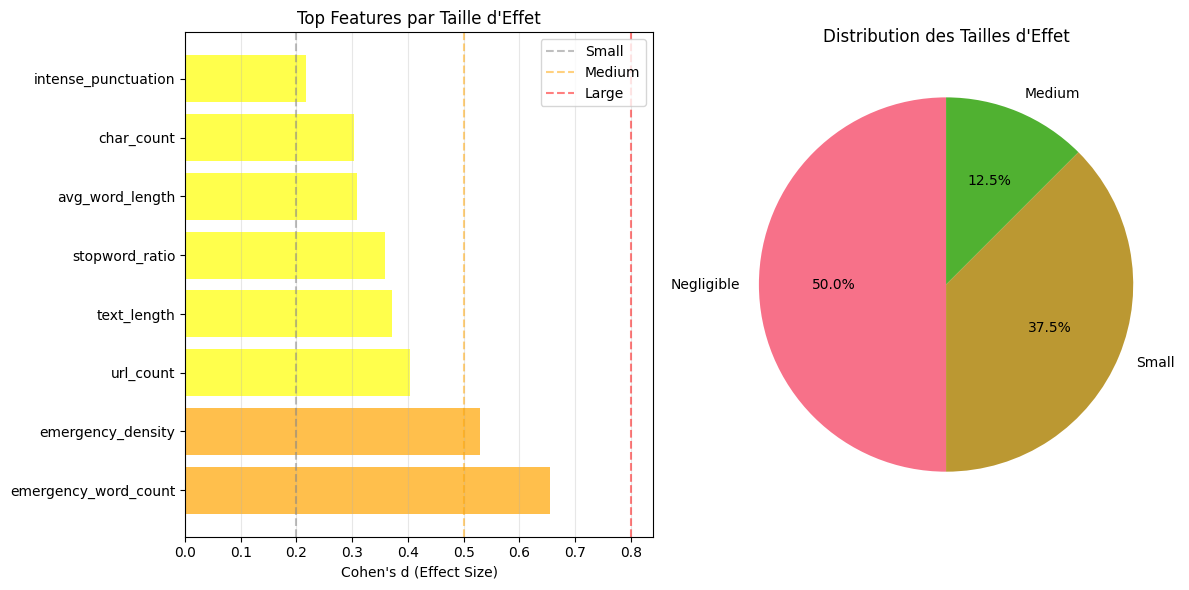

In [87]:
# Tests statistiques de significativité
if 'target' in train_df.columns:
    print("📈 TESTS STATISTIQUES DE SIGNIFICATIVITÉ")
    print("=" * 40)
    
    # Test t de Student pour les features continues
    continuous_features = [col for col in feature_cols if pd.api.types.is_numeric_dtype(X[col]) and X[col].nunique() > 2]
    
    print(f"\n🔬 Test t de Student pour {len(continuous_features)} features continues:")
    ttest_results = []
    
    for feature in continuous_features:
        group_0 = train_df[train_df['target'] == 0][feature]
        group_1 = train_df[train_df['target'] == 1][feature]
        
        # Test t pour échantillons indépendants
        t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
        
        # Calcul de l'effet size (Cohen's d)
        pooled_std = np.sqrt(((len(group_0) - 1) * group_0.var() + (len(group_1) - 1) * group_1.var()) / 
                           (len(group_0) + len(group_1) - 2))
        cohens_d = abs(group_0.mean() - group_1.mean()) / pooled_std if pooled_std > 0 else 0
        
        ttest_results.append({
            'feature': feature,
            't_stat': abs(t_stat),
            'p_value': p_value,
            'cohens_d': cohens_d,
            'significant': p_value < 0.05,
            'effect_size': 'Large' if cohens_d > 0.8 else 'Medium' if cohens_d > 0.5 else 'Small' if cohens_d > 0.2 else 'Negligible'
        })
    
    ttest_df = pd.DataFrame(ttest_results).sort_values('cohens_d', ascending=False)
    
    print("\nTop 10 features par taille d'effet (Cohen's d):")
    display(ttest_df.head(10))
    
    # Résumé des tests
    significant_ttest = ttest_df[ttest_df['significant']]
    print(f"\n📊 Résumé des tests t:")
    print(f"   Features significatives: {len(significant_ttest)}/{len(ttest_df)}")
    print(f"   Effect size large (>0.8): {(ttest_df['cohens_d'] > 0.8).sum()}")
    print(f"   Effect size medium (0.5-0.8): {((ttest_df['cohens_d'] > 0.5) & (ttest_df['cohens_d'] <= 0.8)).sum()}")
    print(f"   Effect size small (0.2-0.5): {((ttest_df['cohens_d'] > 0.2) & (ttest_df['cohens_d'] <= 0.5)).sum()}")
    
    # Visualisation des tailles d'effet
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    top_effects = ttest_df.head(8)
    colors = ['red' if x > 0.8 else 'orange' if x > 0.5 else 'yellow' if x > 0.2 else 'gray' for x in top_effects['cohens_d']]
    plt.barh(range(len(top_effects)), top_effects['cohens_d'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_effects)), top_effects['feature'])
    plt.xlabel("Cohen's d (Effect Size)")
    plt.title('Top Features par Taille d\'Effet')
    plt.grid(axis='x', alpha=0.3)
    
    # Ajout de lignes de référence
    plt.axvline(x=0.2, color='gray', linestyle='--', alpha=0.5, label='Small')
    plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, label='Medium')
    plt.axvline(x=0.8, color='red', linestyle='--', alpha=0.5, label='Large')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    effect_categories = ttest_df['effect_size'].value_counts()
    plt.pie(effect_categories.values, labels=effect_categories.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution des Tailles d\'Effet')
    
    plt.tight_layout()
    plt.show()

else:
    print("⚠️  Pas de colonne target disponible pour les tests statistiques")
    ttest_df = pd.DataFrame()

## 7. ✅ Rapport de Validation Final

In [88]:
# Génération du rapport de validation final
print("✅ RAPPORT DE VALIDATION FINAL")
print("=" * 35)

# Calcul du score de qualité global
quality_scores = []

# 1. Qualité des données (0-100)
data_quality_score = 100
if train_quality['missing_values'] > 0:
    data_quality_score -= 20
if train_quality['duplicates'] > 0:
    data_quality_score -= 15
if train_quality['text_duplicates'] > 0:
    data_quality_score -= 10
if train_quality['empty_texts'] > 0:
    data_quality_score -= 25
if train_quality['type_issues'] > 0:
    data_quality_score -= 15
if train_range_issues > 0:
    data_quality_score -= 15

quality_scores.append(('Qualité des données', max(0, data_quality_score)))

# 2. Cohérence des labels (0-100)
if 'target' in train_df.columns:
    label_quality_score = 100
    if label_validation['issues'] > 0:
        label_quality_score -= 30
    if label_validation['label_conflicts'] > 0:
        label_quality_score -= 40
    if label_validation['imbalance_ratio'] > 3:
        label_quality_score -= 20
    elif label_validation['imbalance_ratio'] > 2:
        label_quality_score -= 10
    
    quality_scores.append(('Cohérence des labels', max(0, label_quality_score)))

# 3. Qualité des features (0-100)
feature_quality_score = 100
if train_features['constant_features'] > 0:
    feature_quality_score -= 30
if train_features['quasi_constant_features'] > 0:
    feature_quality_score -= 20

quality_scores.append(('Qualité des features', max(0, feature_quality_score)))

# 4. Pouvoir prédictif (0-100)
if len(corr_df) > 0:
    # Compter les features avec corrélation significative (>0.1)
    significant_corr = (corr_df['abs_correlation'] > 0.1).sum()
    predictive_score = min(100, significant_corr * 10)  # Max 100 si 10+ features significatives
    
    quality_scores.append(('Pouvoir prédictif', predictive_score))

# Score global
global_score = np.mean([score for _, score in quality_scores])

# Affichage du rapport
print(f"\n📊 SCORES DE QUALITÉ:")
print("-" * 30)
for category, score in quality_scores:
    status = "✅" if score >= 80 else "⚠️" if score >= 60 else "❌"
    print(f"{status} {category:20}: {score:5.1f}/100")

print("-" * 30)
status = "✅" if global_score >= 80 else "⚠️" if global_score >= 60 else "❌"
print(f"{status} {'SCORE GLOBAL':20}: {global_score:5.1f}/100")

# Résumé exécutif
print(f"\n📋 RÉSUMÉ EXÉCUTIF:")
print("-" * 20)
print(f"📊 Datasets: Train ({len(train_df):,} tweets), Test ({len(test_df):,} tweets)")
print(f"⚙️  Features: {train_features['total_features']} features extraites")
print(f"🎯 Classes: {len(label_validation.get('class_distribution', {}))} classes équilibrées (ratio {label_validation.get('imbalance_ratio', 'N/A'):.2f})" if 'target' in train_df.columns else "🎯 Test dataset (pas de labels)")

if len(corr_df) > 0:
    high_corr = (corr_df['abs_correlation'] > 0.2).sum()
    print(f"🧠 Prédictivité: {high_corr} features avec forte corrélation (>0.2)")

# Recommandations
print(f"\n💡 RECOMMANDATIONS:")
print("-" * 20)

recommendations = []

if global_score >= 80:
    recommendations.append("✅ Données de excellente qualité, prêtes pour la modélisation")
elif global_score >= 60:
    recommendations.append("⚠️  Données de bonne qualité avec quelques améliorations possibles")
else:
    recommendations.append("❌ Données nécessitant des améliorations avant modélisation")

if train_features['constant_features'] > 0:
    recommendations.append(f"🗑️  Supprimer {train_features['constant_features']} features constantes")

if train_features['quasi_constant_features'] > 0:
    recommendations.append(f"⚠️  Considérer la suppression de {train_features['quasi_constant_features']} features quasi-constantes")

if len(corr_df) > 0:
    weak_features = (corr_df['abs_correlation'] < 0.05).sum()
    if weak_features > 0:
        recommendations.append(f"🔍 Évaluer l'utilité de {weak_features} features faiblement corrélées")

if len(ttest_df) > 0:
    large_effect = (ttest_df['cohens_d'] > 0.8).sum()
    if large_effect > 0:
        recommendations.append(f"⭐ {large_effect} features avec effet large à privilégier")

for rec in recommendations:
    print(f"   {rec}")

# Verdict final
print(f"\n🏆 VERDICT FINAL:")
print("=" * 20)

if global_score >= 80:
    verdict = "🟢 DONNÉES VALIDÉES - Excellente qualité pour la modélisation ML"
elif global_score >= 60:
    verdict = "🟡 DONNÉES ACCEPTABLES - Qualité suffisante avec vigilance"
else:
    verdict = "🔴 DONNÉES À AMÉLIORER - Nécessite des corrections avant modélisation"

print(verdict)
print(f"Score de confiance: {global_score:.1f}%")

✅ RAPPORT DE VALIDATION FINAL

📊 SCORES DE QUALITÉ:
------------------------------
✅ Qualité des données :  80.0/100
✅ Cohérence des labels: 100.0/100
✅ Qualité des features: 100.0/100
✅ Pouvoir prédictif   : 100.0/100
------------------------------
✅ SCORE GLOBAL        :  95.0/100

📋 RÉSUMÉ EXÉCUTIF:
--------------------
📊 Datasets: Train (6,249 tweets), Test (751 tweets)
⚙️  Features: 20 features extraites
🎯 Classes: 2 classes équilibrées (ratio 1.42)
🧠 Prédictivité: 4 features avec forte corrélation (>0.2)

💡 RECOMMANDATIONS:
--------------------
   ✅ Données de excellente qualité, prêtes pour la modélisation
   🔍 Évaluer l'utilité de 4 features faiblement corrélées

🏆 VERDICT FINAL:
🟢 DONNÉES VALIDÉES - Excellente qualité pour la modélisation ML
Score de confiance: 95.0%
